In [1]:
# import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset

In [2]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

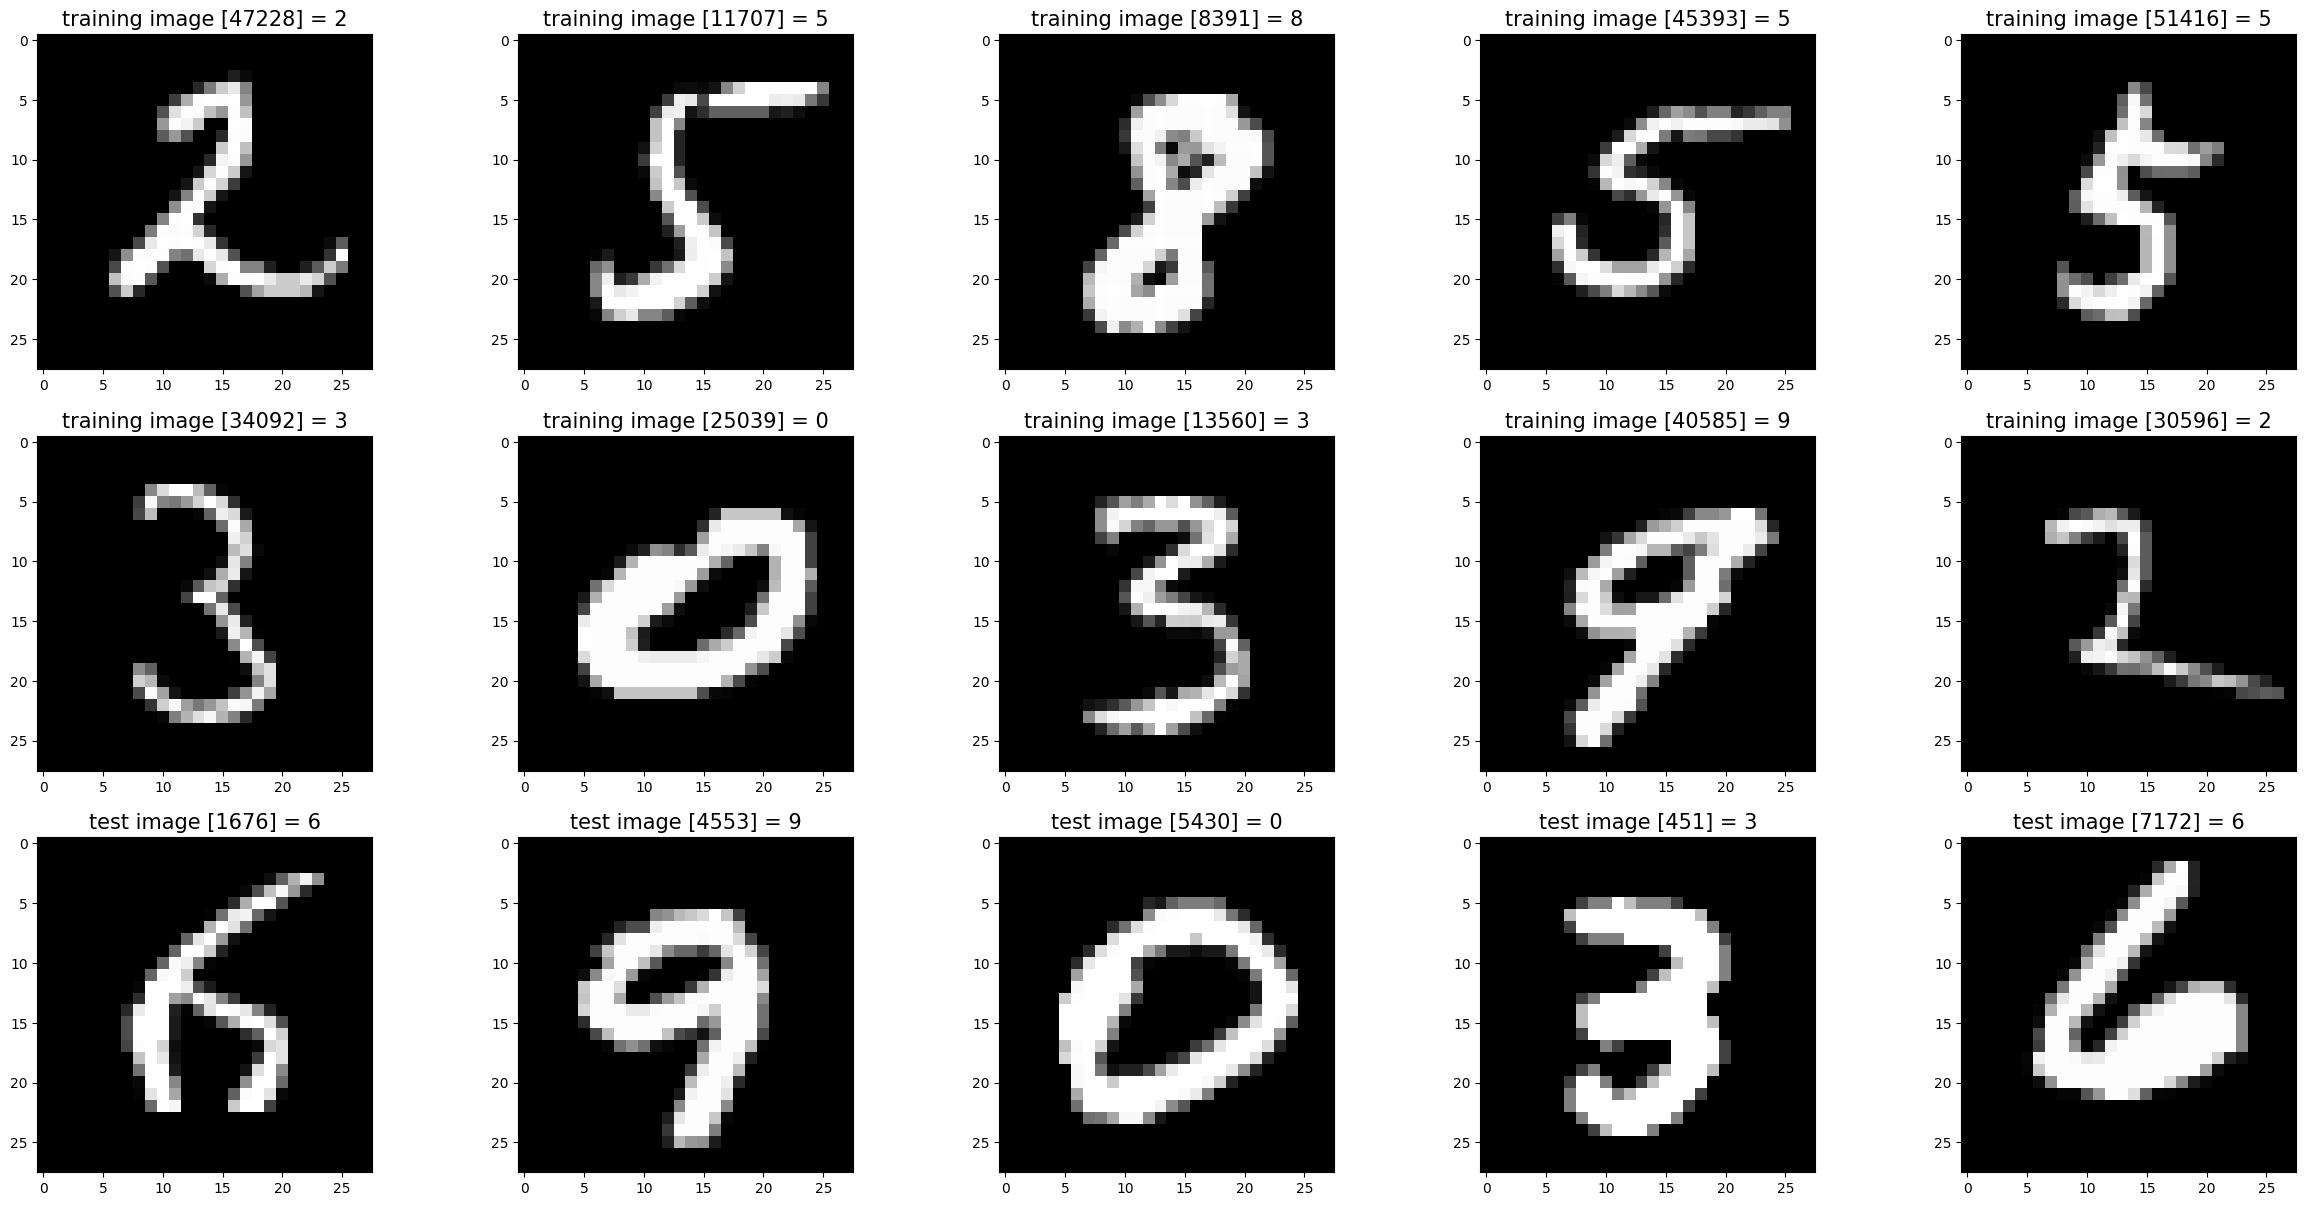

In [3]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = './raw_data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [4]:
X_train = x_train
X_test = x_test

In [5]:
len(X_train[0][0])

28

## Reshaping X and y datasets

In [6]:
def reshape_X(X_train):
    
    '''reshaping X_train so that its shape is equal to (60000, 28, 28) -> 60 000 images, each of them of size 28x28'''
    
    X_train = np.array(X_train)
    X_train = X_train.reshape(-1, 28, 28)
    return X_train

In [7]:
X_train = reshape_X(X_train)
X_test = reshape_X(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

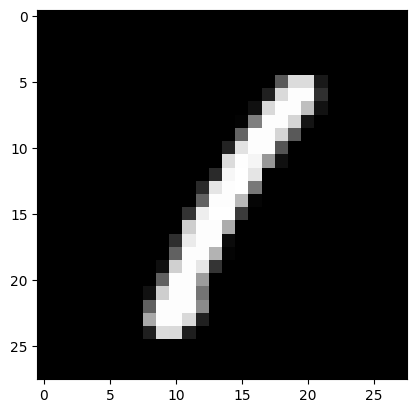

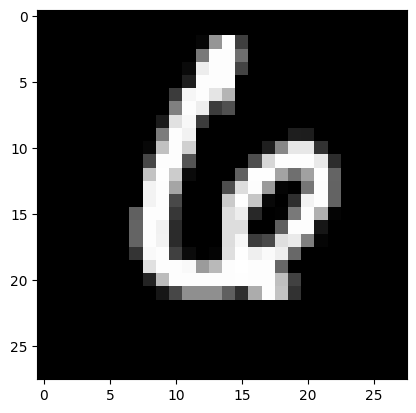

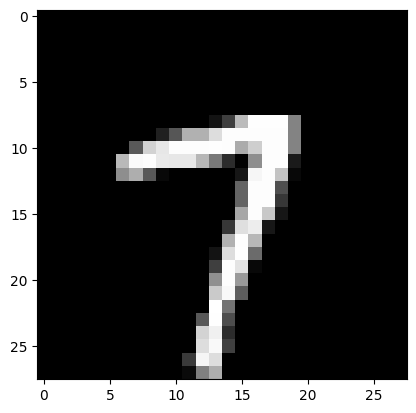

In [8]:
number_of_train_images = len(X_train)
number_of_train_images_to_show = 3 # for example, but feel free to show more images
random_list_of_images_to_show = np.random.randint(0, number_of_train_images , number_of_train_images_to_show)

for i in random_list_of_images_to_show:
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

# Image preprocessing

## Feature Normalization

Neural networks converge faster when input data is somehow normalized

The RGB are coded between 0 and 255. So, we can simply divide the input data by 255 to have all pixels' intensities between 0 and 1

In [9]:
X_train = X_train / 255

X_test = X_test / 255

In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Convolutional Neural Network models need to be fed with images whose last dimension is the number of channels.

The shape of tensors fed into ConvNet is the following: (Number of images, Height, Width, Number of channels). In our dataset the last dimension is missing. 

Our dataset is all black and white, meaning each image lives in a spectrum between 0 (full black) and 1 (full white). So you don't need know the number of channels of black and white images since there's only one channel (the whiteness of blackness of a pixel'. In comparison, colored pictures need multiple channels:
- 3 for Red, Green and Blue (RGB);
- 4 channels for Cyan, Magenta, Yellow and Black.

In [11]:
#add one dimension to X_train and X_test

from tensorflow.keras.backend import expand_dims

X_train = expand_dims(X_train, axis = -1)
X_test = expand_dims(X_test, axis = -1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Target Enconding

In Deep Learning, for multiclass classification you need to encode the target -> use to_categorical to transform the labels

In [12]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [13]:
assert(y_train_cat.shape == (60000,10))
assert(y_test_cat.shape == (10000,10))

The data is now ready to be used

# Convolutional Neural Network

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    
    model = models.Sequential()
    
    #First Convolution and MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(28,28,1), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    #Second Convolution and MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    #Flattening
    model.add(layers.Flatten())
    
    #Dense Layer
    model.add(layers.Dense(10, activation='relu'))
    
    #Predictive layer
    model.add(layers.Dense(10, activation='softmax'))
    
    #model compilation
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    
    return model

In [19]:
model = initialize_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

__Number of trainable parameters in each convolutional layer__

In [22]:
#first Conv2D

first_layer_weights = 8 * (4*4) * 1 + 8
first_layer_weights

136

In [23]:
#second Conv2D

second_layer_weights = 16 * (3*3) * 8 + 16
second_layer_weights

1168

In [24]:
#first dense layer

third_layer_weights = 10 * ((3+4)*(3+4)) * 16 + 10
third_layer_weights

7850

In [25]:
#predictive layer

fourth_layer_weights = 10 * 10 + 10
fourth_layer_weights

110

In [26]:
#total number of weights

total_weights = first_layer_weights + second_layer_weights + third_layer_weights + fourth_layer_weights
total_weights

9264